## About the dataset

This dataset, sourced from Kaggle, contains information regarding advertising on various platforms and its impact on sales.

Dataset link: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input?select=advertising.csv

## Problem Statement

To predict Sales based on medium of advertising

## Import all necessaary libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Processing

In [2]:
#Reading CSV file
sales_data=pd.read_csv("advertising..csv")

#Printing first 5 rows of the data
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#Checking for the rows and columns
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are 200 rows and 4 columns. Datatype for all the columns are float64

In [4]:
#Finding any missing values
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values

In [5]:
#Checking for any duplicates
sales_data.duplicated().sum()

0

There are no duplicate values

In [6]:
#Count of Sales
sales_data["Sales"].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

## Data Analysis through different graphs

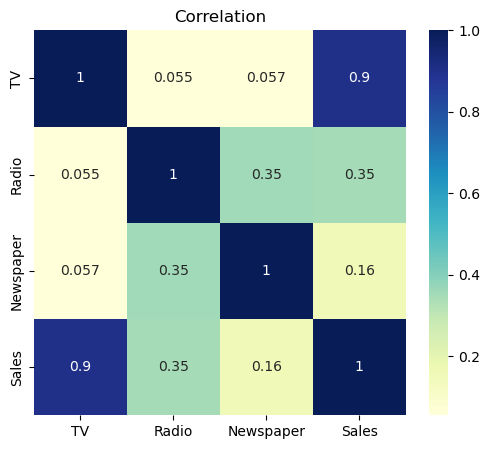

In [7]:
#Correlation between the columns
plt.figure(figsize=(6,5))
sns.heatmap(sales_data.corr(),annot=True,cmap='YlGnBu')
plt.title("Correlation")
plt.show()

In the above observation we can see that TV is highly correlated to Sales

<Figure size 400x300 with 0 Axes>

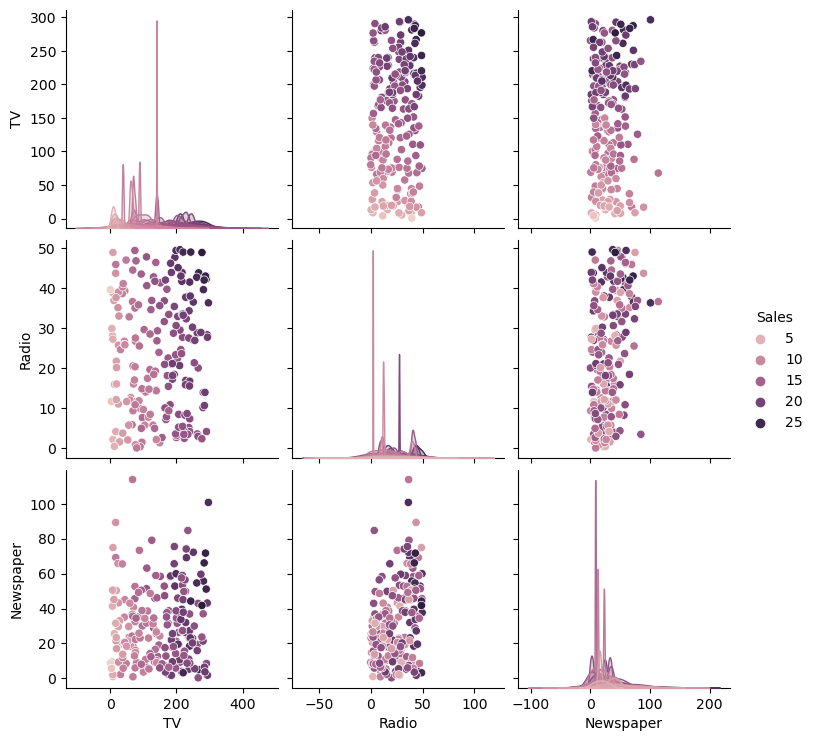

In [8]:
plt.figure(figsize=(4,3))
sns.pairplot(sales_data,hue="Sales")
plt.show()

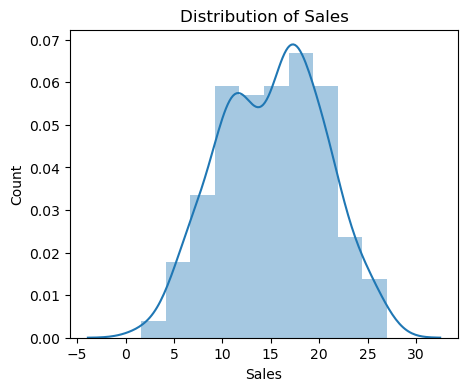

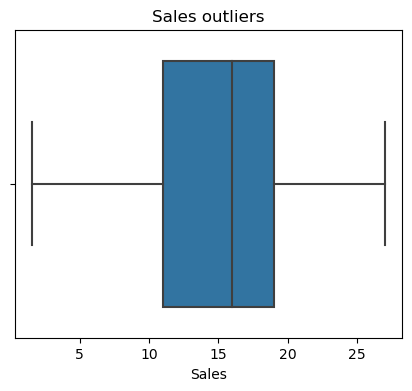

In [9]:
#Analysing Sales for distribution and outliers
plt.figure(figsize=(5,4))
sns.distplot(sales_data["Sales"])
plt.title("Distribution of Sales")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(sales_data["Sales"])
plt.title("Sales outliers")
plt.show()

1. The initial analysis reveals a normal distribution in Sales.
2. The second analysis indicates an absence of outliers in the Sales data.

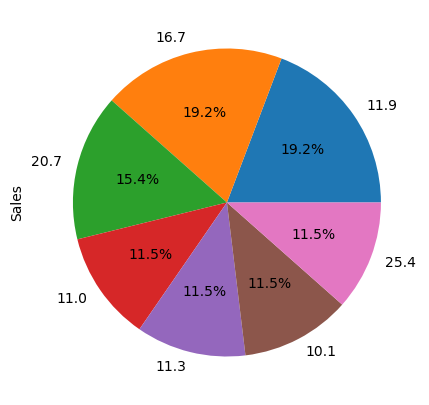

In [10]:
#Analysing Sales with Pie 
plt.figure(figsize=(6,5))
sales_data["Sales"].value_counts().head(7).plot.pie(autopct="%1.1f%%")
plt.show()

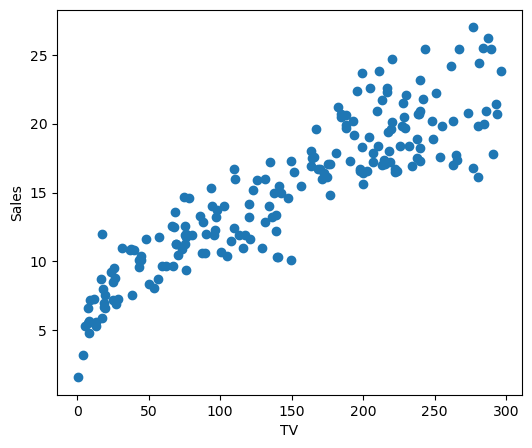

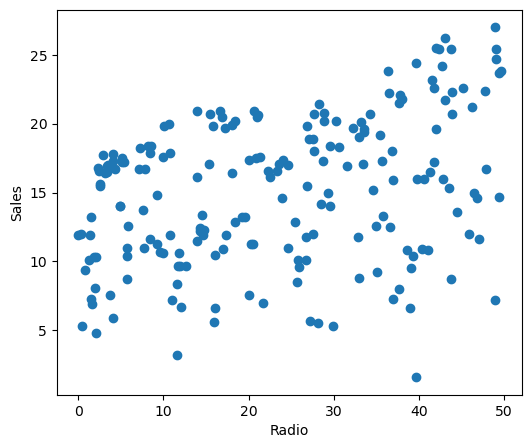

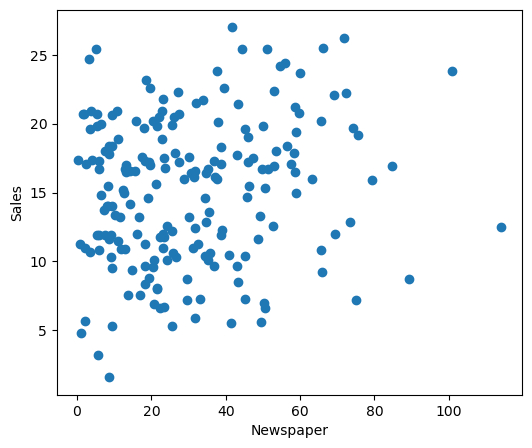

In [11]:
#Analysing Sales and TV
plt.figure(figsize=(6,5))
plt.scatter(sales_data["TV"],sales_data["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(sales_data["Radio"],sales_data["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(sales_data["Newspaper"],sales_data["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In the above observation:

    1. In case of TV advertising sales is rising.
    2. In case of Radio & Newspaper the data is scattered and difficult to interpret.

In [12]:
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Separating X and Y

In [13]:
x=sales_data[["TV"]]
y=sales_data["Sales"]

In [14]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


## Splitting the data into train and test

In [15]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

#Splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=24)

In [16]:
print(x.shape,xtrain.shape,xtest.shape)

(200, 1) (134, 1) (66, 1)


## Model Building

In [17]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression

#Assigning variable
lr=LinearRegression()

#Training the model
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [18]:
ypred

array([16.87191005, 21.27032272, 23.57051301, 11.83393229, 19.68824061,
       12.2266477 , 10.90263573,  9.15785723, 14.33048029, 19.31235585,
        8.44535927,  8.54634323, 18.39227974, 21.69108923, 12.33885211,
       22.66165733, 14.95882495, 19.10477771, 21.67986879, 19.850937  ,
        8.04142341, 10.77921088, 15.20567464, 14.76807747, 19.9631414 ,
       18.91964044, 21.18055919, 19.50871356, 23.07681363, 18.98696308,
       22.29699302, 12.20981704,  7.24477214, 13.10184206, 20.39512836,
       15.72742513, 11.74977898,  9.74693036, 14.29681897, 11.32901246,
        7.4299094 , 17.47781384, 16.38943111, 17.66295111,  7.67675909,
       19.41895004, 16.17063252, 13.70213562, 13.44967571, 12.57448136,
       14.75124681,  7.17183927, 10.74554956, 20.26048307, 19.02623462,
       21.0178628 ,  7.90677812, 20.40073858, 12.70351642, 18.02761542,
       20.30536484,  7.37941742, 11.44121687, 17.80881683, 17.18608239,
        7.99654165])

In [19]:
#Finding the slope value
lr.coef_

array([0.0561022])

In [20]:
#Finding the intercept value
lr.intercept_

6.941820243415458

## Evaluating the model

In [21]:
#Checking r2_score
from sklearn.metrics import r2_score

r2_score(ytest,ypred)

0.827330991848468

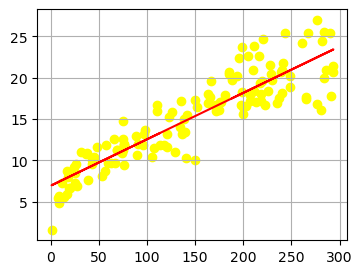

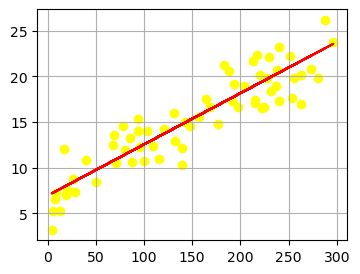

In [22]:
plt.figure(figsize=(4,3))
plt.scatter(xtrain,ytrain,color='yellow')
plt.plot(xtrain,lr.predict(xtrain),color='red')
plt.grid()
plt.show()

plt.figure(figsize=(4,3))
plt.scatter(xtest,ytest,color='yellow')
plt.plot(xtest,lr.predict(xtest),color='red')
plt.grid()
plt.show()

# With an R-squared score of 0.82, this model is estimated to provide accurate results for approximately 80% of the cases, indicating that it is a good fit for the data.